<a href="https://colab.research.google.com/github/taresadere/taresadere/blob/main/feeze_of_mobilenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_gen = ImageDataGenerator(rotation_range=50,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='constant',
                                    cval=0,
                                    rescale=1./255)
valid_data_gen = ImageDataGenerator(rotation_range=45,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='constant',
                                    cval=0,
                                    rescale=1./255)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_path = "drive/My Drive/train"
valid_path ="drive/My Drive/validation"
test_path = "drive/My Drive/test"
IMAGE_SIZE=(224, 224)
from keras.preprocessing import image
classes= ["normal", "follicular", "intense", "scar", "trichiasis", "corneal opacity"]
def model_predict(img_path, model):
    image = cv2.imread(img_path)
    #image = cv2.resize(image, (224, 224))
    image = cv2.resize(image,   IMAGE_SIZE)
    image = image.astype("float") / 255.0
    #image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    res = model.predict(image)
    label = np.argmax(res)
    print("Label", label)
    labelName = classes[label]
    print("Label name:", labelName)
    return labelName


In [ ]:

# Declarations
from keras import backend
from glob import glob
batch_size = 32
EPOCHS = 10

if backend.image_data_format() == 'channels_first':
    INPUT_SHAPE = (3, IMAGE_SIZE[0], IMAGE_SIZE[1])
else:
    INPUT_SHAPE = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)

print(f'input_shape: {INPUT_SHAPE}')

# useful for getting number of output classes
count_of_classes = len(glob(train_path+'/*'))
print(count_of_classes)

input_shape: (224, 224, 3)
6


In [ ]:
# Prepare train/test using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_SIZE),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (IMAGE_SIZE),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 179 images belonging to 6 classes.
Found 55 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
IMG_SHAPE = IMAGE_SIZE 
base_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
outputs = base_model.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(6, activation="softmax")(outputs)

model = Model(inputs=base_model.input, outputs=outputs)
for layer in base_model.layers:
    layer.trainable = False
base_learning_rate = 0.0001
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])
base_model.summary()

Number of layers in the base model:  154
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )     

In [ ]:
base_learning_rate = 0.0001
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])
#base_learning_rate = 0.0001
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              #metrics=['accuracy'])

In [ ]:
now = datetime.datetime.now
t = now()
history = model.fit(training_set,
                    epochs=10,
                    validation_data=test_set)
print('Training time: %s' % (now() - t))  

Epoch 1/10
6/6 [==============================] - 66s 10s/step - loss: 3.8723 - accuracy: 0.2179 - val_loss: 3.6090 - val_accuracy: 0.1636
Epoch 2/10
6/6 [==============================] - 26s 5s/step - loss: 2.1228 - accuracy: 0.4302 - val_loss: 2.1020 - val_accuracy: 0.1818
Epoch 3/10
6/6 [==============================] - 17s 3s/step - loss: 1.3415 - accuracy: 0.5531 - val_loss: 2.5700 - val_accuracy: 0.2182
Epoch 4/10
6/6 [==============================] - 18s 3s/step - loss: 0.9926 - accuracy: 0.6816 - val_loss: 3.4320 - val_accuracy: 0.2364
Epoch 5/10
6/6 [==============================] - 17s 3s/step - loss: 0.6879 - accuracy: 0.7709 - val_loss: 3.3959 - val_accuracy: 0.2727
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 0.6008 - accuracy: 0.8045 - val_loss: 3.4566 - val_accuracy: 0.2545
Epoch 7/10
6/6 [==============================] - 17s 3s/step - loss: 0.3969 - accuracy: 0.8659 - val_loss: 3.2488 - val_accuracy: 0.2364
Epoch 8/10
6/6 [=================

In [ ]:
print('Evaluate on test data:')
results = model.evaluate(test_set, batch_size=32, verbose = 2)
print('Test loss = {0}, Test acc: {1}'.format(results[0], results[1]))

Evaluate on test data:
4/4 - 4s - loss: 1.1921e-07 - accuracy: 0.8333 - 4s/epoch - 923ms/step
Test loss = 1.1920930376163597e-07, Test acc: 0.8333333134651184


In [ ]:
model.save('C:/Users/Dare/Desktop/TDCN GUI/models/resnet.h5')

In [ ]:
from keras.models import load_model
model = load_model("drive/My Drive/mobelnet.h5")

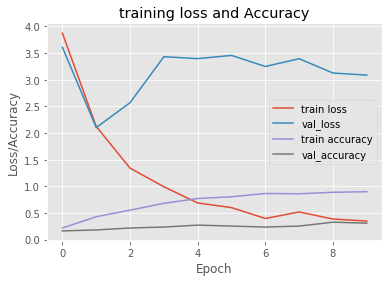

In [ ]:
N= 100
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot( history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot( history.history["val_accuracy"], label="val_accuracy")
plt.title("training loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("drive/My Drive/base_model")

# \\::# making prediction and classification report

In [ ]:
y_predict = model.predict(test_set)

In [ ]:
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix,roc_curve,auc
from PIL import Image
y_pred=model.predict_generator(generator=test_set,)
y_pred=np.argmax(y_pred,axis=1)
print('classification report')
print(classification_report(test_set.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


classification report
              precision    recall  f1-score   support

           0       0.20      0.09      0.13        11
           1       0.29      0.25      0.27         8
           2       0.00      0.00      0.00        10
           3       0.21      0.70      0.32        10
           4       0.25      0.10      0.14        10
           5       0.00      0.00      0.00         6

    accuracy                           0.20        55
   macro avg       0.16      0.19      0.14        55
weighted avg       0.16      0.20      0.15        55



# plot confusion matrix 

Confusion Matrix without Normalization


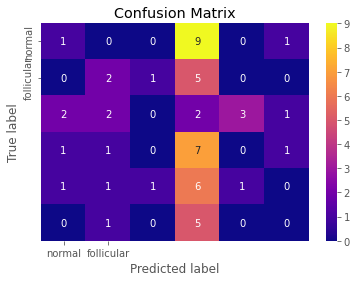

Confusion Matrix with Normalized Values


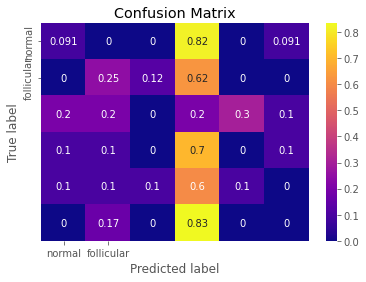

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sns
def plot_confusion_matrix(normalize):
  classes = ['normal','follicular', 'intense', 'scar', 'trichiasis','corneal opacity']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(test_set.classes, y_pred, normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')